<a href="https://colab.research.google.com/github/kakkiichan/Machine-Learning/blob/master/Deep-Learning/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term
60000 train samples
10000 test samples


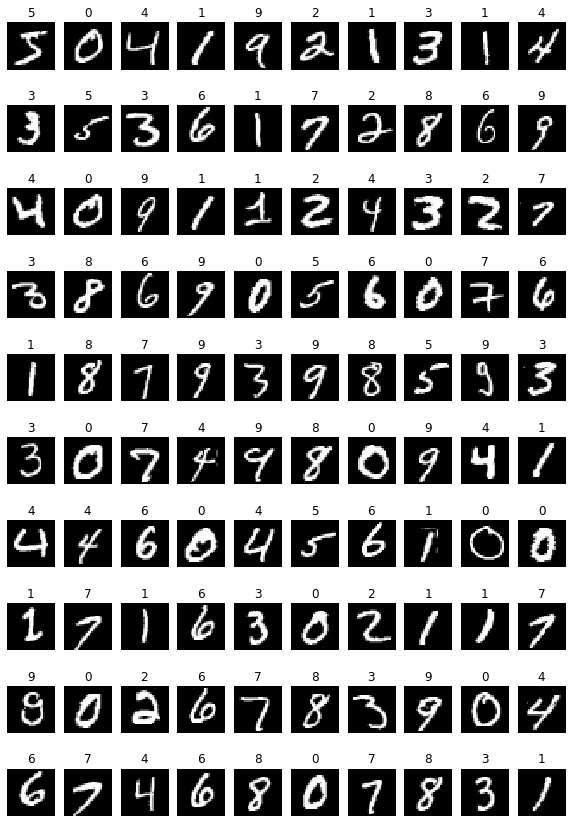

In [0]:
import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))

for i in range(100):
    plt.subplot(10, 10, i + 1, xticks=[], yticks=[])
    plt.title(y_train[i].argmax())
    plt.axis('off')
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 10)          910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 490)        

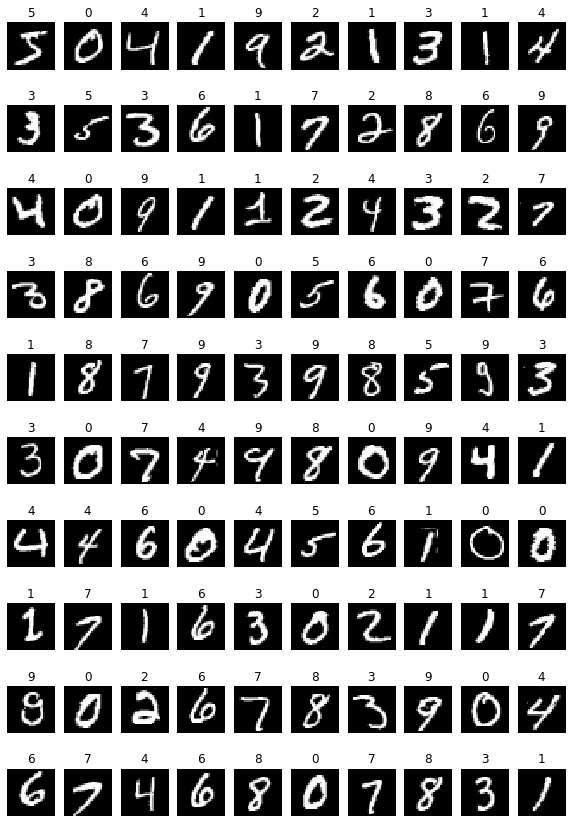

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))

for i in range(100):
    plt.subplot(10, 10, i + 1, xticks=[], yticks=[])
    plt.title(y_train[i].argmax())
    plt.axis('off')
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')



from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import GlobalAveragePooling2D
from keras.layers.core import Flatten, Activation



model = Sequential()
# model.add( Conv2D(フィルタの数, フィルタの大きさ, padding) )
# 最初の層だけは input_shape の指定が必要
model.add(Conv2D(10, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu')) # Conv2Dのところにまとめて書くのも可能
model.add(MaxPool2D())
model.add(Conv2D(10, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(10, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
                        metrics=['accuracy'])
model.summary() # どういうモデルなのかを表示してくれる




history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




In [20]:
from PIL import Image
from io import BytesIO 
import numpy as np

filename ="/content/drive/My Drive/AI学習/3の手書き.JPG"

# 画像ファイルパスから読み込み
img = Image.open(filename).convert('L')

im = np.array(img)
im.reshape(28,28,1)

ValueError: ignored

In [15]:
x_test[0].shape

(28, 28, 1)

In [21]:
model.predict(x_test[0],)

ValueError: ignored